# Question_2: Plot the average delay time per provider (EUROSTAR, NMBS, THALYS).



In [1]:
import src.data_processing.data as data
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
trips = data.full_trips

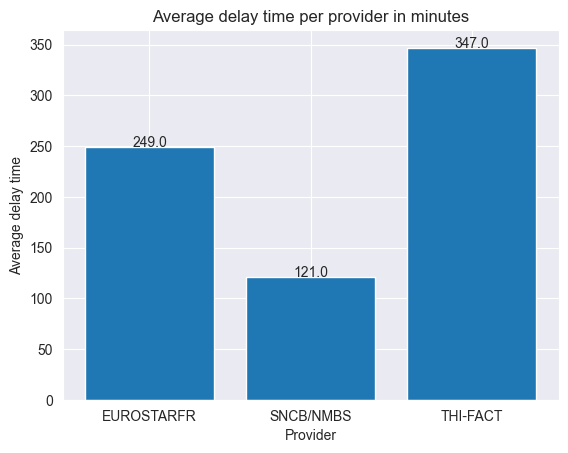

<Figure size 1000x1000 with 0 Axes>

In [3]:
trips = data.full_trips
def addvaluelabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')

delay_provider = trips.groupby("Railway operators")["Delay time"].mean().reset_index().round()
plt.bar(delay_provider["Railway operators"], delay_provider["Delay time"])

addvaluelabels(delay_provider["Railway operators"], delay_provider["Delay time"])

plt.title("Average delay time per provider in minutes")
plt.xticks(rotation=0)
plt.xlabel("Provider")
plt.ylabel("Average delay time")
plt.figure(figsize=(10,10))
plt.show()





In [4]:
trips[trips["Train number"] == 11]

,Unnamed: 0,Date of departure,Train number,Relation,Railway operators,Railway of departure,Time of real arrival,Time of real departure,Time of planned arrival,Time of planned departure,Direction of relation,Name of the stop,Railway of arrival,Date of planned arrival,Date of planned departure,Date of real arrival,Date of real departure,Delay time
6049,6049,2020-09-21,11,ICE,SNCB/NMBS,0/1,NaT,2020-09-21 06:24:57,NaT,2020-09-21 06:25:00,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,brussel-zuid/bruxelles-midi,NaN,NaT,2020-09-21,NaT,2020-09-21,0
6052,6052,2020-09-21,11,ICE,SNCB/NMBS,0/1,2020-09-21 06:27:07,2020-09-21 06:27:07,2020-09-21 06:27:00,2020-09-21 06:27:00,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,brussel-kapellekerk/bruxelles-chapelle,0/1,2020-09-21,2020-09-21,2020-09-21,2020-09-21,7
6055,6055,2020-09-21,11,ICE,SNCB/NMBS,36N,2020-09-21 06:39:12,2020-09-21 06:39:12,2020-09-21 06:36:00,2020-09-21 06:36:00,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,schaarbeek/schaerbeek,36N,2020-09-21,2020-09-21,2020-09-21,2020-09-21,192
6058,6058,2020-09-21,11,ICE,SNCB/NMBS,36N,2020-09-21 06:43:19,2020-09-21 06:43:19,2020-09-21 06:40:00,2020-09-21 06:40:00,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,nossegem,36N,2020-09-21,2020-09-21,2020-09-21,2020-09-21,199
6061,6061,2020-09-21,11,ICE,SNCB/NMBS,36N,2020-09-21 06:46:32,2020-09-21 06:46:32,2020-09-21 06:43:00,2020-09-21 06:43:00,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,veltem,36N,2020-09-21,2020-09-21,2020-09-21,2020-09-21,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,885,2020-09-26,11,ICE,SNCB/NMBS,36N,2020-09-26 06:42:15,2020-09-26 06:42:15,2020-09-26 06:39:00,2020-09-26 06:39:00,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,zaventem,36N,2020-09-26,2020-09-26,2020-09-26,2020-09-26,195
888,888,2020-09-26,11,ICE,SNCB/NMBS,36N,2020-09-26 06:42:12,2020-09-26 06:42:12,2020-09-26 06:40:00,2020-09-26 06:40:00,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,kortenberg,36N,2020-09-26,2020-09-26,2020-09-26,2020-09-26,132
891,891,2020-09-26,11,ICE,SNCB/NMBS,36N,2020-09-26 06:44:12,2020-09-26 06:44:12,2020-09-26 06:42:00,2020-09-26 06:42:00,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,erps-kwerps,36N,2020-09-26,2020-09-26,2020-09-26,2020-09-26,132
894,894,2020-09-26,11,ICE,SNCB/NMBS,36N,2020-09-26 06:47:14,2020-09-26 06:47:14,2020-09-26 06:44:00,2020-09-26 06:44:00,ICE: BRUSSEL-ZUID -> FRANKFURT(MAIN) HBF,herent,36N,2020-09-26,2020-09-26,2020-09-26,2020-09-26,194


In [5]:
trips.groupby("Railway operators")["Delay time"].mean().reset_index().round()

,Railway operators,Delay time
0,EUROSTARFR,249.0
1,SNCB/NMBS,121.0
2,THI-FACT,347.0


In [6]:
df = trips[['Train number', 'Railway operators', 'Time of real arrival','Time of planned arrival', 'Name of the stop']]    #filteren op kolommen dat je nodig hebt
df.dropna(subset = ['Time of planned arrival'], inplace = True) #lege values laten vallen, want je kan hier geen delay van berekenen

C:\Users\Annelien\AppData\Local\Temp\ipykernel_20816\1258043647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset = ['Time of planned arrival'], inplace = True) #lege values laten vallen, want je kan hier geen delay van berekenen


In [7]:
difference = df.sort_values(by=['Train number', 'Time of planned arrival'], ascending = True).groupby('Train number').tail(1)
difference.head(5)

,Train number,Railway operators,Time of real arrival,Time of planned arrival,Name of the stop
768,10,SNCB/NMBS,2020-09-26 21:33:24,2020-09-26 21:35:00,brussel-zuid/bruxelles-midi
164,11,SNCB/NMBS,2020-09-26 07:38:56,2020-09-26 07:30:00,hergenrath
36329,12,SNCB/NMBS,2020-09-25 20:09:27,2020-09-25 19:35:00,brussel-zuid/bruxelles-midi
4566,13,SNCB/NMBS,2020-09-26 09:30:00,2020-09-26 09:30:00,hergenrath
6781,14,SNCB/NMBS,2020-09-26 17:54:22,2020-09-26 17:35:00,brussel-zuid/bruxelles-midi


In [8]:
difference['Time of real arrival'] = pd.to_datetime(difference['Time of real arrival'], format='%H:%M:%S')      #je format je real arrival into datetime
difference['Time of planned arrival'] = pd.to_datetime(difference['Time of planned arrival'], format='%H:%M:%S')      #je format je planned arrival into datetime
difference['Delta'] = difference.apply(lambda x: (x['Time of real arrival']-x['Time of planned arrival']).total_seconds(), axis = 1)    #average delay time in seconds

In [9]:
difference['Delta'].head()

768       -96.0
164       536.0
36329    2067.0
4566        0.0
6781     1162.0
Name: Delta, dtype: float64

In [10]:
difference.loc[difference['Delta'] < 0, "Delta"]=0

In [11]:
differencePerOp = difference.groupby('Railway operators')['Delta'].mean().reset_index(name = 'mean').round(0)
#pak mean van average delay time & reset_index maakt nieuwe kolom aan voor mean

In [12]:

differencePerOp.head()

,Railway operators,mean
0,EUROSTARFR,142.0
1,SNCB/NMBS,137.0
2,THI-FACT,633.0
